In [1]:
# Installing shap in Anaconda Prompt/ Jupyter terminal / Command Prompt
# Type:
# conda install conda-forge::shap
# pip install shap

In [2]:
# Importing packages / libraries /functions
import pandas as pd # For tabular data
# For generic Maths
import numpy as np
from numpy import absolute
# Modeling
from sklearn.linear_model import Ridge
# Metrics / Functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
# Shap
import shap
shap.initjs()
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# To make codes reproducible
seed = 7

In [3]:
# Reading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood2.csv')

In [4]:
# Exploring the dataset

In [5]:
mydata.head()

,Time,Area,ET,P,AT,SM
0,1/1/2005,3563530.00,0.000003,3.757262,12.265436,1.301278
1,1/2/2005,3474497.25,0.000002,4.382504,13.751855,1.320082
2,1/3/2005,3467959.75,0.000004,17.027948,10.879114,1.377332
3,1/4/2005,3605078.50,0.000005,40.451202,6.159296,1.406343
4,1/5/2005,3945098.25,0.000005,23.137531,2.658197,1.457837


In [6]:
mydata.describe()

,Area,ET,P,AT,SM
count,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000
mean,2.828388e+06,0.000024,3.134611,14.031194,1.222583
std,1.235075e+06,0.000017,5.791662,10.815100,0.146059
min,1.170620e+06,-0.000001,0.000000,-15.540076,0.698136
25%,1.863795e+06,0.000007,0.055491,5.142480,1.134451
50%,2.569146e+06,0.000021,0.479799,14.949548,1.248526
75%,3.612540e+06,0.000040,3.720712,23.502130,1.332297
max,6.852320e+06,0.000062,72.185623,35.047968,1.548314


In [7]:
mydata.shape

(3994, 6)

In [8]:
# Output and input data preparation

In [9]:
# The output or target variable, y
y = mydata['Area']

In [10]:
y.head()

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64

In [11]:
y.shape

(3994,)

In [12]:
# The input variables or feature, X
X = mydata.drop(['Time', 'Area'], axis = 1)

In [13]:
X.head()

,ET,P,AT,SM
0,0.000003,3.757262,12.265436,1.301278
1,0.000002,4.382504,13.751855,1.320082
2,0.000004,17.027948,10.879114,1.377332
3,0.000005,40.451202,6.159296,1.406343
4,0.000005,23.137531,2.658197,1.457837


In [14]:
X.shape

(3994, 4)

In [15]:
# Please run the VIF and scale/standardize the features before continuing

In [16]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [17]:
# Checking the dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2795, 4) (1199, 4) (2795,) (1199,)


In [18]:
###### Ridge Regresion Modeling ###########

In [19]:
# Please run the hyperparameter tuning using your own dataset to get your parameter values

In [20]:
# Instantiation of the model
model = Ridge(alpha = 1e-5, fit_intercept = True, solver = 'cholesky')

In [21]:
# Fitting the model on the training dataset
rg = model.fit(X_train, y_train)

In [22]:
# Training model evaluation
y_predtr = rg.predict(X_train)
print('The training r-q is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-q is: 0.6391203232308643
The training MAE is: 571936.3322600725
The training MSE is: 546593226197.3367


In [23]:
# Testing model evaluation
y_predts = rg.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE is:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.6427838622726212
The testing MAE is: 565122.5977809578
The testing MSE is: 552925983529.7233


In [24]:
# The k-fold cross-validation

In [25]:
# On the training
train_cv = cross_val_score(rg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [26]:
train_cv

array([-5.58126096e+11, -5.76117654e+11, -4.70472923e+11, -5.13749451e+11,
       -5.33514036e+11, -5.37529161e+11, -5.40270327e+11, -5.57958400e+11,
       -5.89139030e+11, -6.05149323e+11])

In [27]:
# The absollute mean cv score
print('The absolute mean training cv score is:', absolute(np.mean(train_cv)))

The absolute mean training cv score is: 548202640289.3421


In [28]:
# On the testing dataset
test_cv = cross_val_score(rg, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [29]:
test_cv

array([-5.43697584e+11, -5.09247306e+11, -5.64706637e+11, -5.24383133e+11,
       -4.20878437e+11, -5.93628471e+11, -6.35442808e+11, -5.30182562e+11,
       -5.35250212e+11, -6.65946125e+11])

In [30]:
# The absolute mean score
print('The absolute mean testing cv score is:', absolute(np.mean(test_cv)))

The absolute mean testing cv score is: 552336327520.0151


In [31]:
########### SHAP ################

In [32]:
shap.initjs()

In [33]:
# Creating an explainer on the training dataset to calculate shap values
explainer = shap.LinearExplainer(rg, X_train)

In [34]:
# Outputting shap values on the training dataset
shap_valuestr = explainer.shap_values(X_train)

In [35]:
shap_valuestr

array([[-1.41590945e+03, -4.13038697e+05,  2.64661354e+05,
         9.57614151e+05],
       [ 2.39873815e+04,  4.03021163e+04,  1.05948872e+06,
        -1.04872660e+05],
       [-1.38972202e+04,  4.16076459e+04, -1.03809654e+06,
        -1.25901595e+06],
       ...,
       [-9.06281845e+03, -5.00248117e+04, -3.73681084e+05,
         3.59877599e+05],
       [-1.19660517e+04,  4.10378886e+04, -9.67185746e+05,
        -8.91592379e+04],
       [-1.42082810e+04,  4.23095759e+04, -1.80739148e+06,
         9.64520371e+05]])

In [36]:
# Some shap plots on the training model###

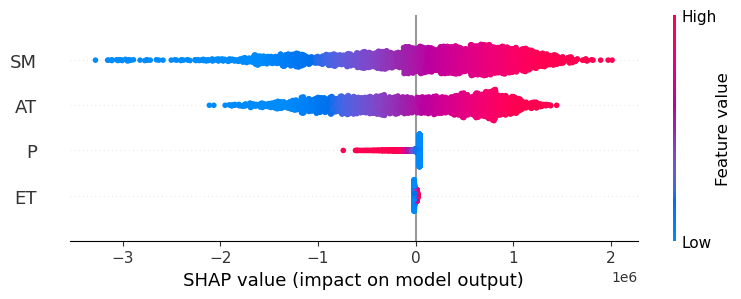

In [37]:
# Summary plot (combimnation of feature importance and feature effect plots)
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

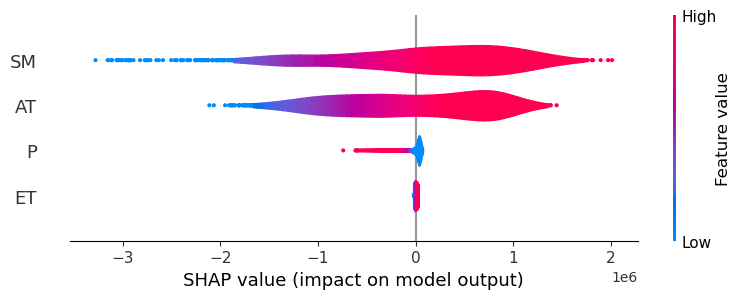

In [38]:
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'violin')

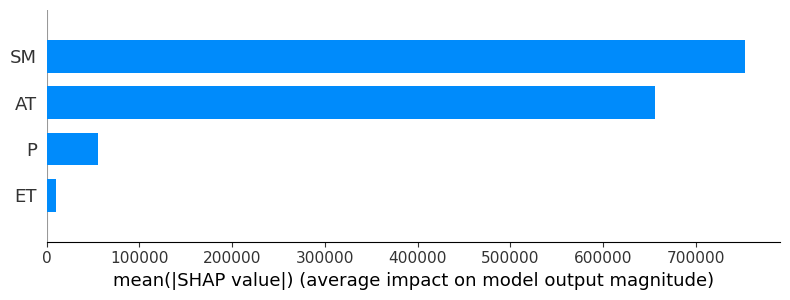

In [39]:
# Feature importance plot (features with large absolute shape values are important)
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')

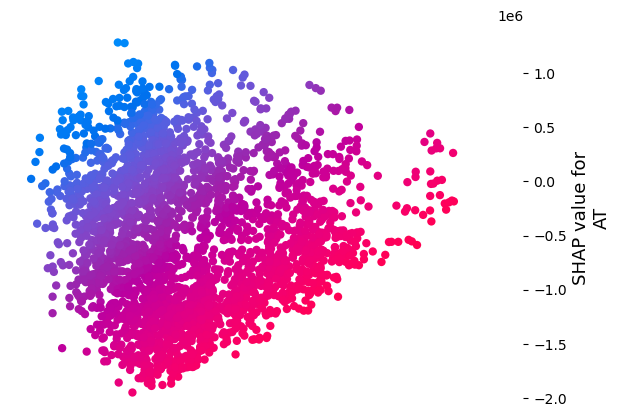

In [40]:
# Embedding plot (projects shap values to 2D using Principal Component Analysis
# for visualization)
shap.embedding_plot('AT', explainer.shap_values(X_train), feature_names = X_train.columns)

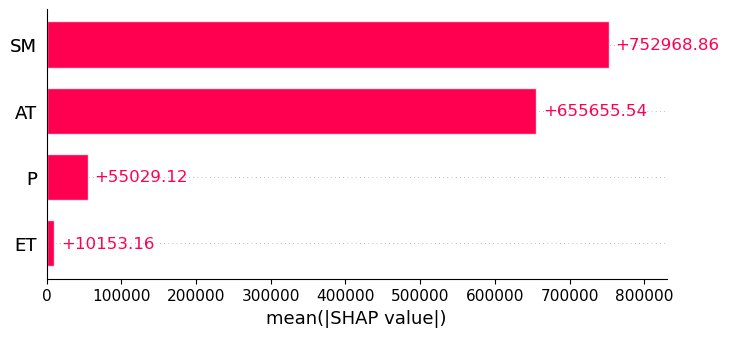

In [41]:
# Global plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

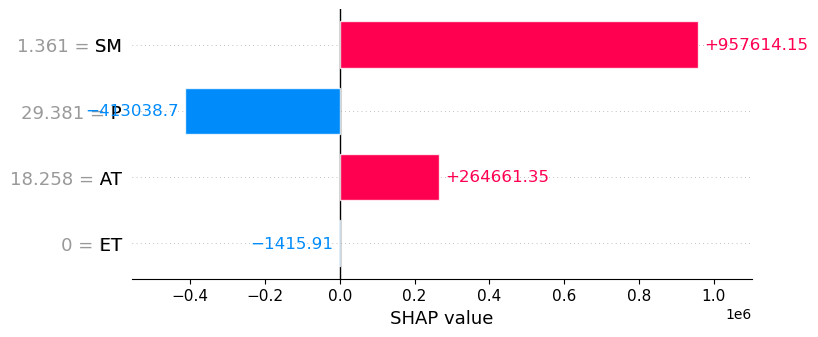

In [42]:
# Local bar plot
shap.plots.bar(shap_valuestr[0])

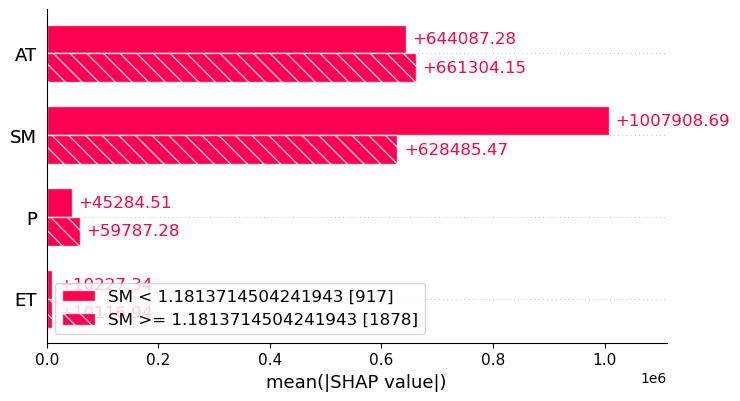

In [43]:
# Auto-cohort feature plot
shap.plots.bar(shap_valuestr.cohorts(2).abs.mean(0))

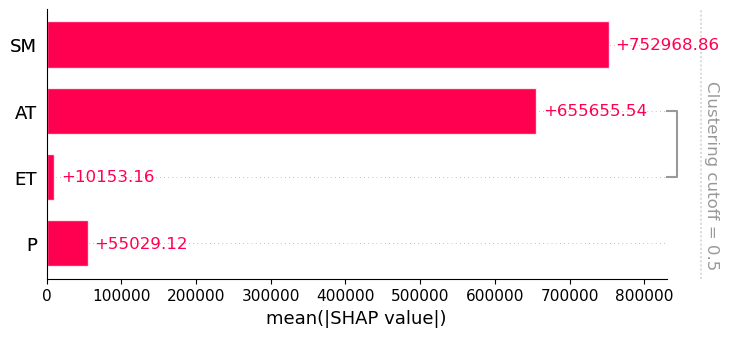

In [45]:
# Feature clustering
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_valuestr, clustering = clustering)


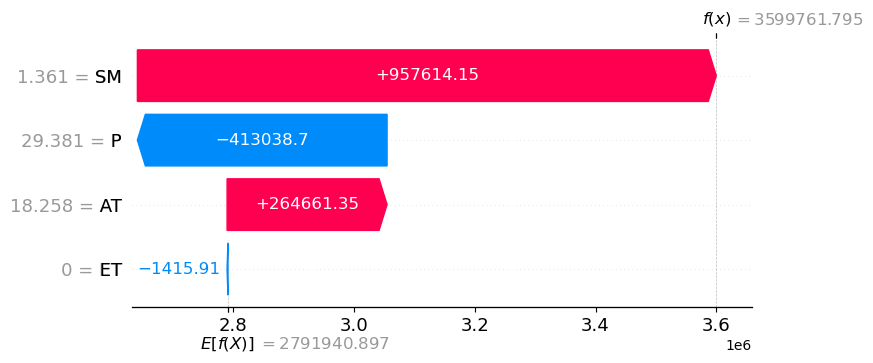

In [46]:
# warterfall plot
shap.plots.waterfall(shap_valuestr[0])

In [47]:
# Force plot
shap.plots.force(shap_valuestr[0])

In [48]:
# Outputting shap values on the testing model
shap_valuests = explainer.shap_values(X_test)

In [49]:
shap_valuests

array([[-5.73453371e+02, -1.00840843e+05,  6.86953220e+05,
        -7.16110864e+05],
       [-4.46171219e+03,  4.17672981e+04, -2.13819011e+04,
        -8.34399986e+04],
       [ 1.93214709e+04,  3.33845561e+04,  1.04394579e+06,
         3.86839992e+05],
       ...,
       [ 6.57828587e+02, -1.28146012e+05,  2.00473179e+05,
         6.27106316e+05],
       [-2.97121297e+03,  4.19208073e+04, -4.29889738e+05,
         1.33922032e+06],
       [ 7.59189014e+03, -1.51406526e+05,  7.56465340e+05,
        -3.37588088e+04]])

In [50]:
# Some plots

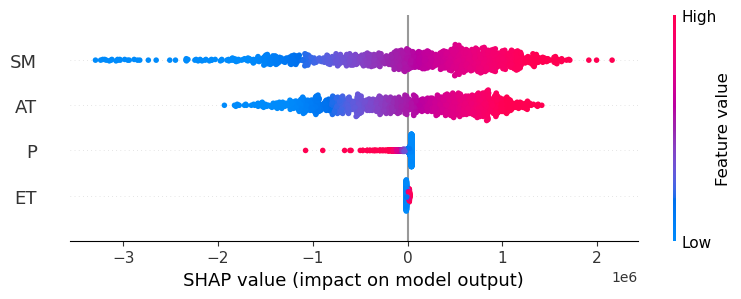

In [114]:
# Summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns)

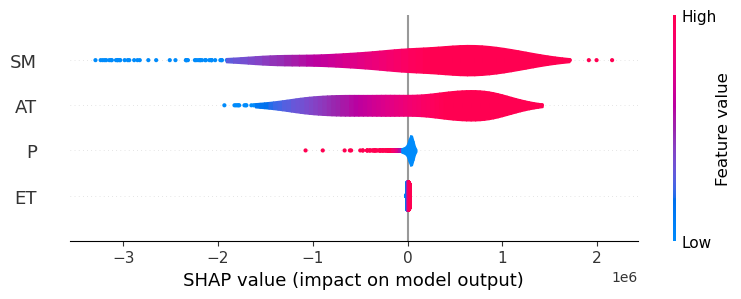

In [116]:
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'violin')

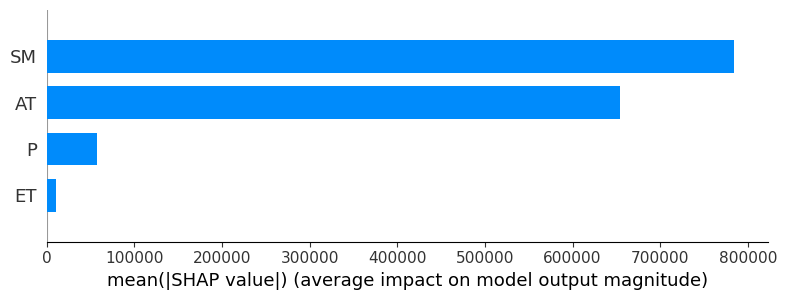

In [117]:
# Featue importance plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar')

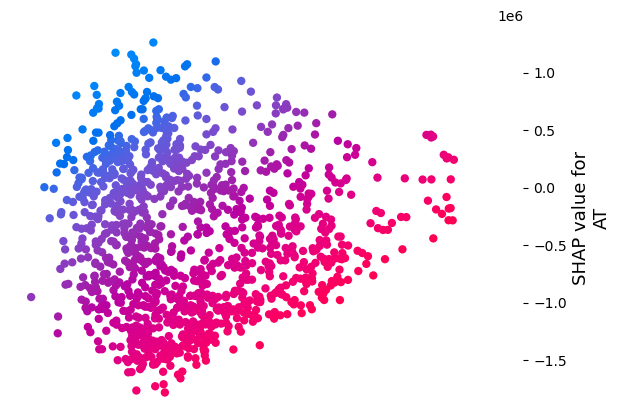

In [119]:
# Embedding plot
shap.embedding_plot('AT', explainer.shap_values(X_test), feature_names = X_test.columns)

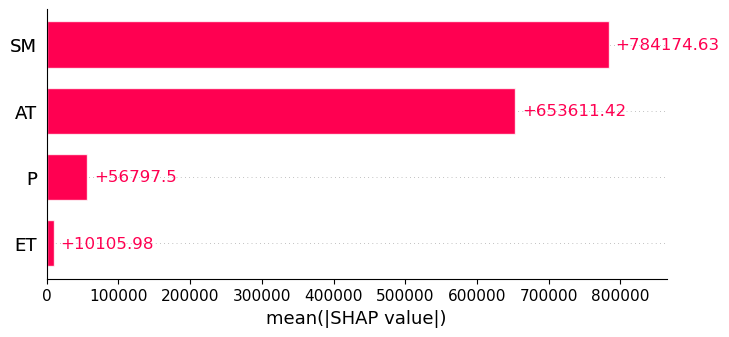

In [120]:
# Global bar plot
shap_valuests = explainer(X_test)
shap.plots.bar(shap_valuests)

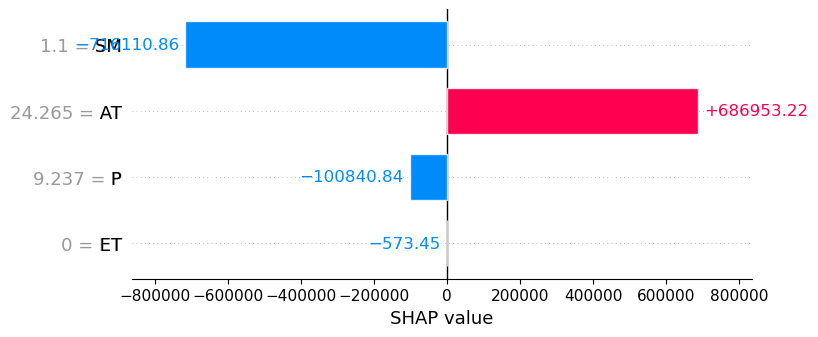

In [121]:
# Local plot
shap.plots.bar(shap_valuests[0])

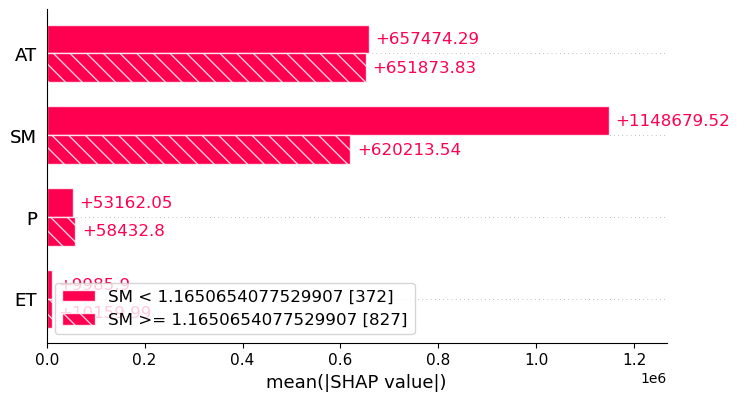

In [123]:
# Auto-cohort plot
shap.plots.bar(shap_valuests.cohorts(2).abs.mean(0))

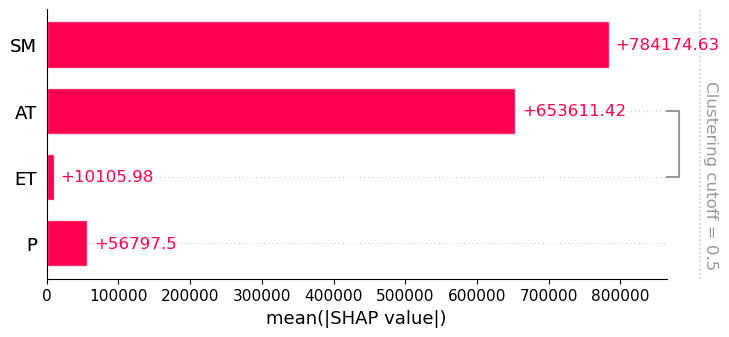

In [125]:
# Feature clustering
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering)

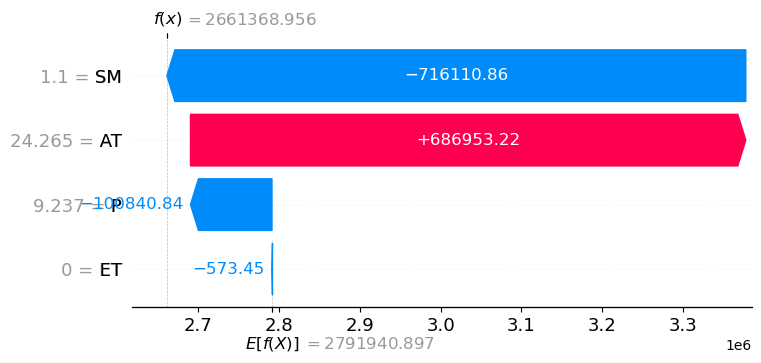

In [126]:
# waterfall plot
shap.plots.waterfall(shap_valuests[0])

In [127]:
# Force plot
shap.plots.force(shap_valuests[0])